In [1]:
import sys
sys.path.insert(0, "..")
sys.path.insert(0, "../../torchdriveenv")

In [2]:
import os
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import DataLoader

In [ ]:
### shuffled birdviews

In [8]:
data_dir = "../datasets/itra_single/obs_data"

In [17]:
converted_images = []
shuffled_obs = []
for file in os.listdir(data_dir):
    file_path = os.path.join(data_dir, file)
    if file_path[-4:] != ".pkl":
        continue
    with open(file_path, "rb") as f:
        obs_data = pickle.load(f)
    print(obs_data)
    break
    flattened_image = obs_data.reshape(3, -1)
    indices = np.random.permutation(flattened_image.shape[1])  # Generate random indices
    shuffled_image = flattened_image[:, indices]

#     # Step 3: Reshape back to (3, 64, 64)
#     shuffled_image = shuffled_image.reshape(3, 64, 64)
#     shuffled_obs.append(shuffled_image)
#     converted_images.append(Image.fromarray(shuffled_image.numpy().astype(np.uint8).transpose(1, 2, 0), 'RGB'))

tensor([[[ 80.,  80.,   0.,  ..., 255., 255., 155.],
         [ 80.,  80.,   0.,  ..., 255., 155., 155.],
         [155., 155.,  80.,  ..., 155., 155., 255.],
         ...,
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.]],

        [[127., 127.,   0.,  ..., 255., 255., 155.],
         [127., 127.,   0.,  ..., 255., 155., 155.],
         [155., 155., 127.,  ..., 155., 155., 255.],
         ...,
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.]],

        [[ 86.,  86.,   0.,  ..., 255., 255., 155.],
         [ 86.,  86.,   0.,  ..., 255., 155., 155.],
         [155., 155.,  86.,  ..., 155., 155., 255.],
         ...,
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.]]]

In [10]:
# ! mkdir ../datasets/irrelevant_obs_data_shuffled

In [11]:
# obs_data_path = "../datasets/irrelevant_obs_data_shuffled"
# for i, image in enumerate(converted_images):
#     image.save(f'{obs_data_path}/{i}.png')

In [12]:
# for i, bv in enumerate(shuffled_obs):
#     with open(f'{obs_data_path}/{i}.pkl', "wb") as f:
#         pickle.dump(bv, f)

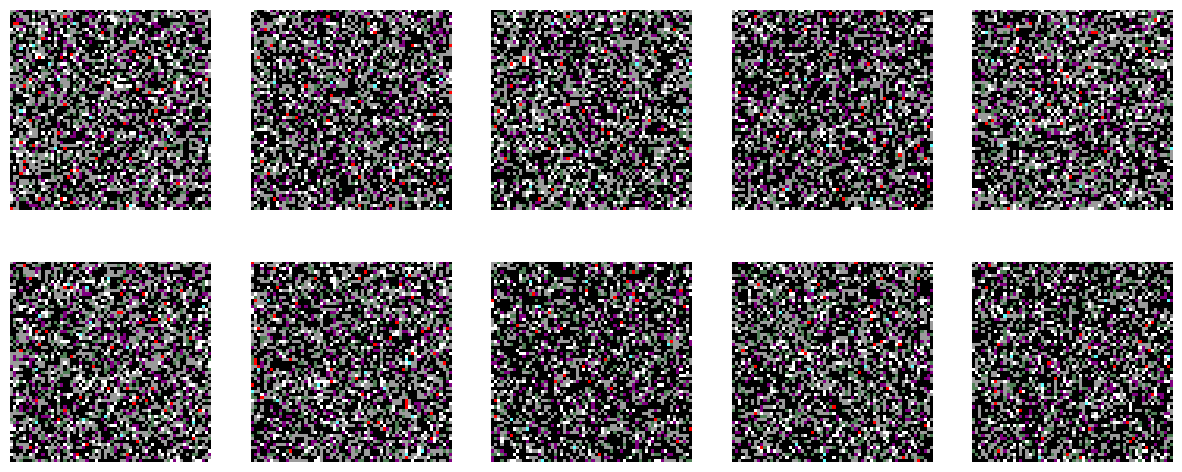

In [6]:
# # Set up a grid for displaying 10 images (e.g., 2 rows x 5 columns)
# fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# # Plot each image in the grid
# for ax, img in zip(axes.flat, converted_images[:10]):
#     ax.imshow(img)
#     ax.axis('off')  # Turn off axis

# plt.show()

In [ ]:
### cat photos

In [13]:
cat_data_dir = "../datasets/irrelevant_obs_data_cat"

In [16]:
for file in os.listdir(cat_data_dir):
    file_path = os.path.join(cat_data_dir, file)
    if file_path[-4:] != ".png":
        continue
    image = Image.open(file_path)
    image_array = np.array(image)
    image_tensor = torch.from_numpy(image_array).permute(2, 0, 1).float()
    print(image_tensor)
#     with open(f'{file_path[:-4]}.pkl', "wb") as f:
#         pickle.dump(image_tensor, f)

tensor([[[ 31.,  31.,  30.,  ...,   2.,   3.,   1.],
         [ 31.,  31.,  30.,  ...,   0.,   2.,   3.],
         [ 32.,  32.,  31.,  ...,   2.,   2.,   3.],
         ...,
         [138., 136., 138.,  ..., 182., 174., 168.],
         [147., 148., 141.,  ..., 175., 182., 187.],
         [141., 134., 149.,  ..., 180., 177., 176.]],

        [[ 30.,  30.,  31.,  ...,   2.,   3.,   1.],
         [ 30.,  30.,  31.,  ...,   0.,   2.,   3.],
         [ 31.,  31.,  32.,  ...,   2.,   2.,   3.],
         ...,
         [131., 129., 129.,  ..., 170., 162., 156.],
         [140., 141., 132.,  ..., 163., 170., 175.],
         [134., 127., 140.,  ..., 168., 165., 164.]],

        [[ 26.,  26.,  25.,  ...,   2.,   5.,   3.],
         [ 26.,  26.,  25.,  ...,   0.,   4.,   5.],
         [ 27.,  27.,  26.,  ...,   2.,   2.,   3.],
         ...,
         [115., 113., 114.,  ..., 148., 140., 134.],
         [122., 123., 115.,  ..., 139., 148., 153.],
         [115., 108., 123.,  ..., 144., 143., 142.]]]

tensor([[[129., 135., 126.,  ..., 170., 161., 186.],
         [121., 129., 153.,  ..., 146., 144., 148.],
         [140., 126., 139.,  ..., 148., 148., 154.],
         ...,
         [ 38.,  61.,  72.,  ..., 171., 156., 161.],
         [ 44.,  30.,  46.,  ..., 137., 157., 149.],
         [ 35.,  46.,  92.,  ..., 142., 151., 156.]],

        [[101., 107.,  99.,  ..., 141., 130., 153.],
         [ 93., 101., 126.,  ..., 117., 110., 113.],
         [112.,  98., 112.,  ..., 117., 113., 117.],
         ...,
         [ 25.,  48.,  58.,  ..., 140., 125., 130.],
         [ 31.,  17.,  32.,  ..., 106., 124., 116.],
         [ 22.,  33.,  78.,  ..., 111., 118., 123.]],

        [[ 79.,  85.,  80.,  ..., 111.,  99., 122.],
         [ 71.,  80., 107.,  ...,  87.,  82.,  83.],
         [ 90.,  77.,  93.,  ...,  88.,  85.,  90.],
         ...,
         [ 16.,  39.,  49.,  ...,  94.,  81.,  86.],
         [ 22.,   8.,  23.,  ...,  60.,  81.,  73.],
         [ 13.,  24.,  69.,  ...,  65.,  75.,  80.]]]